In [485]:
# Run script to get dataframe
%run ThaMTD.py

ThaMTD.py:63: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  return (mtd, sma)


In [271]:
EI_df.head()

,Subject,AUC_T,AUC_D,AUC_0bk,MD_T,Pu_T,Pu_D,MD_D,Pu_0bk,MD_0bk,MTD_T,MTD_D,MTD_T_D,MTD_0bk,FH_Dprime,HF_Dprime,Dprime
0,503.0,7.738374,-2.138017,7.613183,0.218333,0.532110,0.644524,0.351816,0.416018,0.165467,0.307412,0.191032,0.000000e+00,0.033551,3.034236,4.431161,3.732698
1,505.0,9.747882,4.343963,13.348804,0.464342,0.757087,0.669143,0.353578,0.435890,0.254415,0.682656,0.293261,1.387779e-17,0.092031,2.392429,4.507706,3.450068
2,508.0,25.454366,18.747130,18.814288,0.362940,0.629735,0.625219,0.433634,0.562798,0.406919,0.665784,0.588685,-1.387779e-17,0.137611,2.363039,2.990435,2.676737
3,509.0,10.452838,3.664562,8.301258,-0.102326,0.242784,0.111962,-0.176676,0.307567,-0.035008,0.549262,0.254814,1.040834e-17,-0.039216,1.697852,3.411230,2.554541
4,510.0,4.742861,3.606895,4.889569,-0.239049,-0.050619,-0.181583,-0.201174,-0.370435,-0.335558,0.014349,-0.097101,0.000000e+00,-0.088098,1.226374,1.407084,1.316729


Pairplot on MTD connectivity and FIR AUC

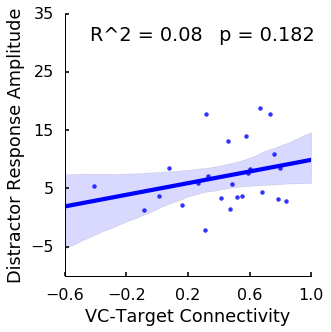

In [445]:
%matplotlib inline
sns.set_context("poster", font_scale=1)
EI_df=EI_df.rename(columns = {'MTD_T':'VC-Target Connectivity', 'MTD_D': 'VC-Distractor Connectivity'})
EI_df=EI_df.rename(columns = {'AUC_T':'Target Response Amplitude', 'AUC_D': 'Distractor Response Amplitude'})
g = sns.pairplot(EI_df, kind='reg', size=5, aspect=1, x_vars=['VC-Target Connectivity'],
                 y_vars=['Distractor Response Amplitude'])
# vars=['AUC_T', 'Pu-T', 'MD-T', 'MTD-T']
#g=sns.pairplot(unoutlieddata, , kind="reg")
def corrfunc(x, y, **kws):
    x = sm.add_constant(x) 
    e = sm.OLS(y, x).fit()
    r = e.rsquared
    p = e.pvalues[1]
    ax = plt.gca()
    ax.annotate("R^2 = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(" p = {:.3f}".format(p),
                xy=(.6, .9), xycoords=ax.transAxes)

g.map(corrfunc)
g.set(xticks=[-0.6,-0.2,0.2,0.6,1])
g.set(yticks=[-5,5,15,25,35])
#g.tight_layout()
g.savefig('/home/despoB/kaihwang/bin/ThaMTD/AUC_MTD.png')
#plt.xlabel('Purchase amount', fontsize=18)

pairplot of tha conn and AUC

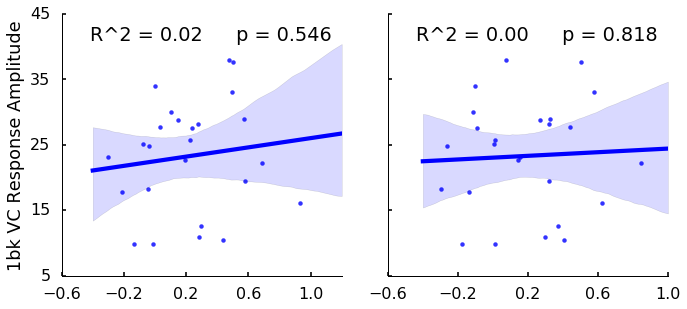

In [494]:
sns.set_context("poster")
#EI_df=EI_df.rename(columns = {'MTD_T':'VC-Target Connectivity', 'MTD_D': 'VC-Distractor Connectivity'})
EI_df=EI_df.rename(columns = {'AUC_T':'1bk Target Response Amplitude', 'AUC_D': '1bk Distractor Response Amplitude'})
EI_df=EI_df.rename(columns = {'AUC_0bk':'0bk Response Amplitude'})
EI_df=EI_df.rename(columns = {'AUC_1bk_VC':'1bk VC Response Amplitude'})
EI_df=EI_df.rename(columns = {'AUC_0bk_VC':'0bk VC Response Amplitude'})
g = sns.pairplot(EI_df, kind='reg',  x_vars=['VC_1bk_Pu', 'VC_1bk_MD'],y_vars=['1bk VC Response Amplitude'],size=5)
#g.fig.set_label(x="");
g.map(corrfunc)
g.set(xlabel="")
g.set(yticks=[5,15,25,35, 45])
g.set(xticks=[-0.6,-0.2,0.2,0.6,1])
g.savefig('/home/despoB/kaihwang/bin/ThaMTD/AUC_MTD.png')

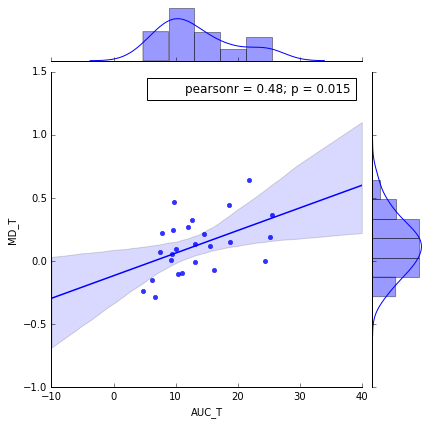

In [260]:
sns.jointplot(x="AUC_T", y="MD_T", data=EI_df, kind="reg");

Pairplot on behav

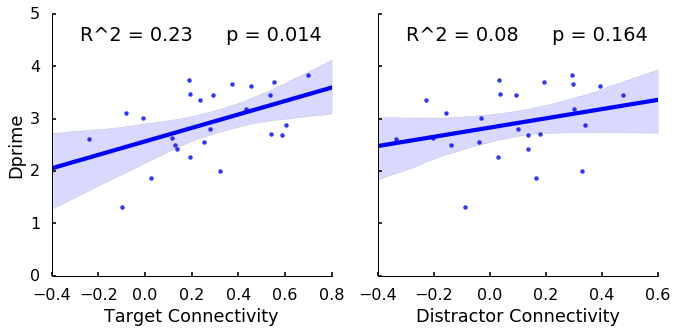

In [511]:

#EI_df=EI_df.rename(columns = {'MTD_D':'Target Connectivity'})
EI_df=EI_df.rename(columns = {'MTD_P':'Distractor Connectivity'})
g = sns.pairplot(EI_df, kind='reg',  x_vars=['Target Connectivity', 'Distractor Connectivity'], y_vars=['Dprime'], size=5)
g.map(corrfunc)

#g.set(xlabel="")
g.set(yticks=[0,1,2,3,4, 5])
#g.set(xticks=[-0.6,-0.2,0.2,0.6,1])
g.savefig('/home/despoB/kaihwang/bin/ThaMTD/bbcorr.png')
#g.savefig('/home/despoB/kaihwang/bin/ThaMTD/AUC_MTD.png')
#g = sns.pairplot(EI_df, kind='reg',  x_vars=['AUC_T', 'AUC_D'], y_vars=['Dprime', 'HF_Dprime', 'FH_Dprime'])
#g.map(corrfunc)


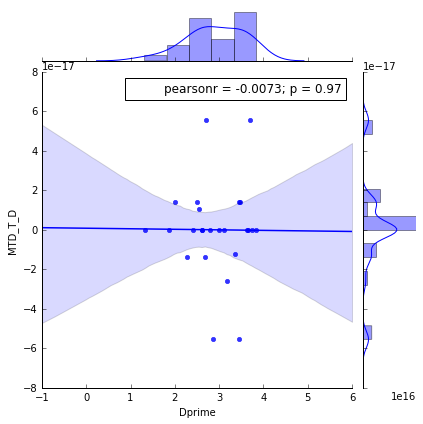

In [274]:
sns.jointplot(x="Dprime", y="MTD_T_D" , data=EI_df, kind="reg");

Bar plot for tha MTD coeffs

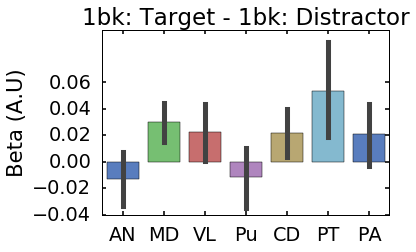

In [438]:
#g = sns.factorplot(x="Thalamic Nuclei", kind = 'bar', hue="Conditions", data=TD_thaMTD_df)
#g.despine(left=True)

#g = sns.PairGrid(data=TD_thaMTD_df,  y_vars=['Thalamic Nuclei'], x_vars=['T', 'D', 'P', 'T-P'])
#g.map(sns.barplot)
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','T'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','T']-0.03
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','T'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','T']-0.04
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','P'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','P']+0.03
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','D'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','D']-0.02
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','D'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','D']-0.02
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','T-P'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','T']-TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','P']
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','T-P'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','T']-TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','P']
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','D-P'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','D']-TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PT','P']
#TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','D-P'] = TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','D']-TD_thaMTD_df.loc[TD_thaMTD_df['Thalamic Nuclei']=='PA','P']



sns.set_context("poster", font_scale=1.2)
#sns.despine()
g=sns.barplot(data=TD_thaMTD_df, x='Thalamic Nuclei', y='T-D', ci=60, palette="muted")

g.set(yticks=[-0.04,-0.02,0,0.02,0.04,0.06])
g.set_title('1bk: Target - 1bk: Distractor')
g.set_xlabel('')
g.set_ylabel('Beta (A.U)')
g.figure.tight_layout()
g.figure.savefig('/home/despoB/kaihwang/bin/ThaMTD/Tha_MTD.png')

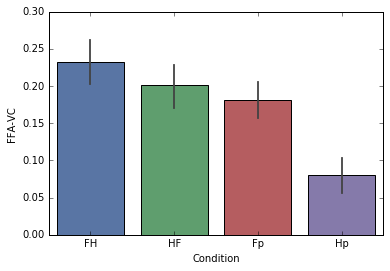

In [267]:
sns.barplot(data=TD_MTD_df, x='Condition', y='FFA-VC', ci=60, palette="deep")

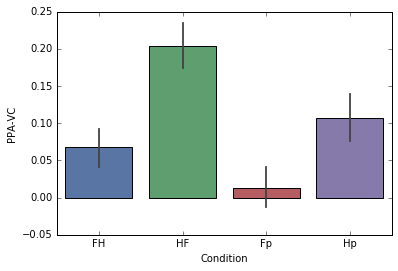

In [268]:
sns.barplot(data=TD_MTD_df, x='Condition', y='PPA-VC', ci=60, palette="deep")

TSNR

In [282]:
d=pd.DataFrame()
d['ROI'] =['MD', 'VL', 'AN', 'Pu', 'CD', 'PUT', 'PA', 'MFG']
d['TSNR'] = [77, 93, 84, 81, 96, 88, 90, 155]

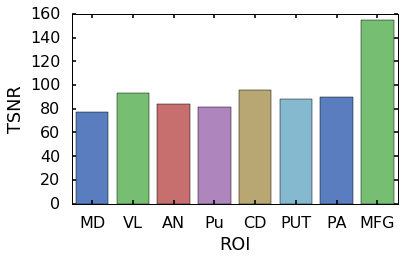

In [295]:
sns.set_context("poster")
p=sns.barplot(data=d, x='ROI', y='TSNR',palette="muted")
p.figure.tight_layout()
p.figure.savefig('/home/despoB/kaihwang/bin/ThaMTD/TSNR.png')

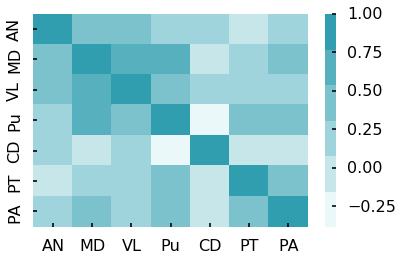

In [307]:
subject=505
condition='HF'
ffa_ts, ppa_ts, vc_ts, tha_ts, bg_ts = load_ts(subject, condition)

ts=np.hstack((tha_ts,bg_ts))
p=sns.heatmap(np.corrcoef(ts.T), xticklabels=['AN', 'MD', 'VL', 'Pu', 'CD', 'PT', 'PA'],yticklabels=['AN', 'MD', 'VL', 'Pu', 'CD', 'PT', 'PA'], cmap=sns.light_palette((210, 90, 60), input="husl"))
p.figure.tight_layout()
p.figure.savefig('/home/despoB/kaihwang/bin/ThaMTD/cc.png')